In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [11]:
X, y = load_iris(return_X_y=True,as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2126,test_size=0.2)
df_train = X_train.copy()
df_train['specie'] = y_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 91 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   specie             120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.6 KB


In [12]:
df_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
73,6.1,2.8,4.7,1.2,1
136,6.3,3.4,5.6,2.4,2
24,4.8,3.4,1.9,0.2,0
96,5.7,2.9,4.2,1.3,1
104,6.5,3.0,5.8,2.2,2
143,6.8,3.2,5.9,2.3,2
97,6.2,2.9,4.3,1.3,1
132,6.4,2.8,5.6,2.2,2
120,6.9,3.2,5.7,2.3,2
99,5.7,2.8,4.1,1.3,1


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.835833,0.828971,4.3,5.1,5.80,6.4,7.9
sepal width (cm),120.0,3.051667,0.446646,2.0,2.8,3.00,3.3,4.4
petal length (cm),120.0,3.780000,1.766714,1.0,1.5,4.35,5.1,6.9
petal width (cm),120.0,1.208333,0.760648,0.1,0.3,1.30,1.8,2.5
specie,120.0,1.016667,0.819749,0.0,0.0,1.00,2.0,2.0


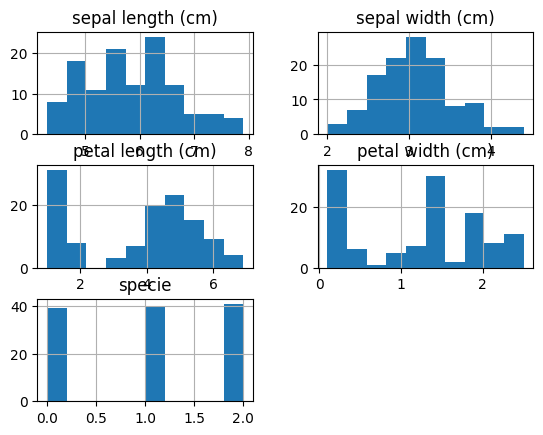

In [14]:
df_train.hist()
plt.show()

/workspaces/naive_bayes/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


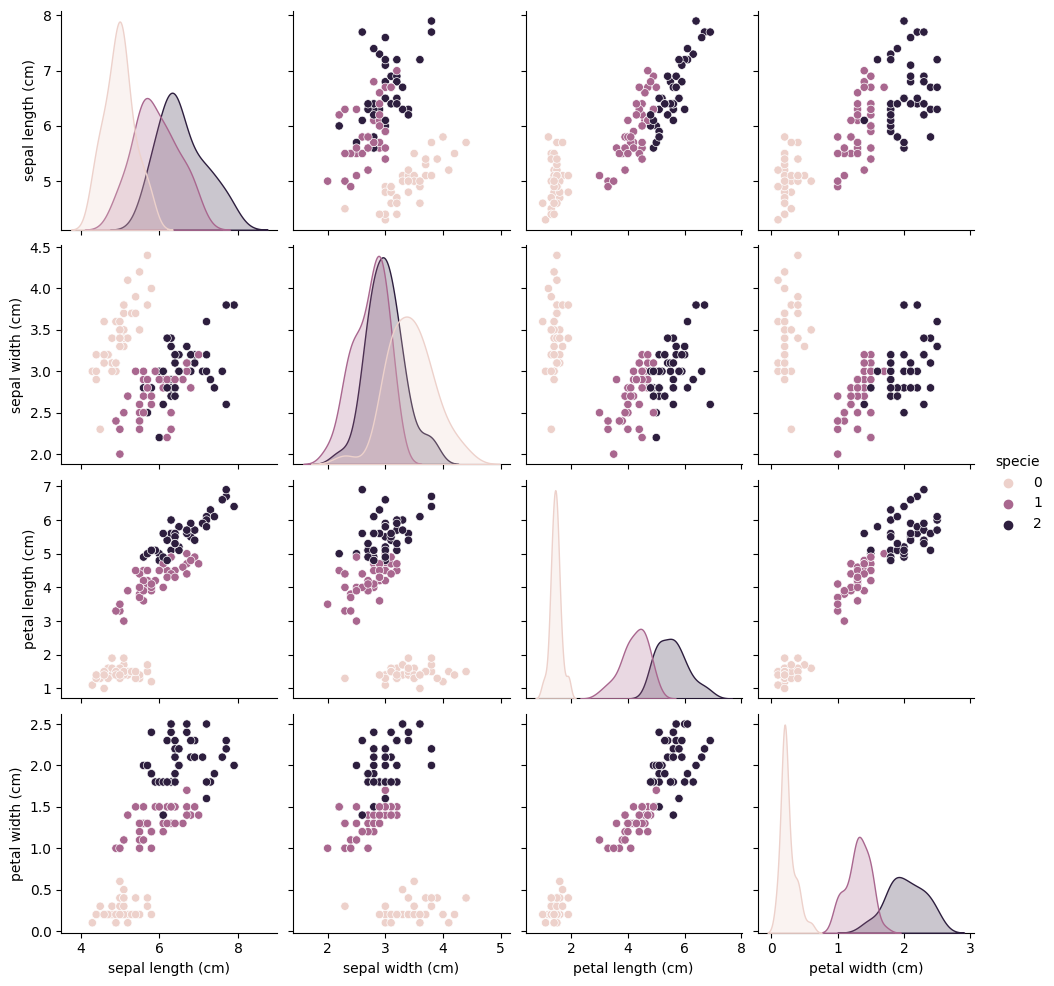

In [15]:
sns.pairplot(data=df_train,hue='specie')
plt.show()

In [20]:
X_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.066322,0.871955,0.811665
sepal width (cm),-0.066322,1.000000,-0.400053,-0.341626
petal length (cm),0.871955,-0.400053,1.000000,0.962244
petal width (cm),0.811665,-0.341626,0.962244,1.000000


In [16]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [18]:
y_hat = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,y_hat):.2F}')

Accuracy: 0.87
